In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scipy.misc
from matplotlib.pyplot import imshow
import cv2

Using TensorFlow backend.


In [2]:
#loading train set
train = pd.read_csv('mnist_train.csv')
X_train = train.iloc[:, 1:]
Y_train = train.iloc[:, 0]

In [3]:
X_train.shape

(60000, 784)

In [4]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [5]:
# Normalize inputs
X_train = X_train / 255.0

In [6]:
def plot_digits(X, Y):
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title('Digit:{}'.format(Y[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()

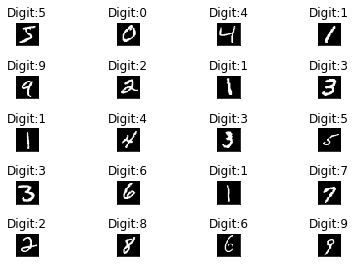

In [7]:
#plot some of image from train set
plot_digits(X_train, Y_train)

In [8]:
#Train-Test Split
X_dev, X_val, Y_dev, Y_val = train_test_split(X_train, Y_train, test_size=0.03, shuffle=True, random_state=2019)
print(X_dev.shape, Y_dev.shape, X_val.shape, Y_val.shape, X_train.shape, Y_train.shape)
T_dev = to_categorical(Y_dev)
T_val = to_categorical(Y_val)

(58200, 784) (58200,) (1800, 784) (1800,) (60000, 784) (60000,)


In [9]:
#Reshape the input 
X_dev = X_dev.reshape(X_dev.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

In [10]:
print(T_dev.shape, T_val.shape)

(58200, 10) (1800, 10)


In [11]:
model = Sequential()
    #X = ZeroPadding2D((2,2))(X_input)
    
model.add(Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu', 
                 input_shape=(28, 28, 1), kernel_initializer='glorot_uniform'))
model.add(MaxPool2D((2,2), strides=(2,2)))
    
model.add(Conv2D(filters=48, kernel_size=(5,5), strides=(1,1), padding='valid', activation='relu', kernel_initializer='glorot_uniform'))
model.add(MaxPool2D((2,2), strides=(2,2)))
    
model.add(Flatten())
model.add(Dense(120, activation='relu', kernel_initializer='glorot_uniform'))
    
model.add(Dense(84, activation='relu', kernel_initializer='glorot_uniform'))
    
model.add(Dense(10, activation='softmax', kernel_initializer='glorot_uniform'))
    

In [12]:
model.build()

In [13]:
#adam = Adam(lr=5e-4)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#model.summary()

In [14]:
# Set a learning rate annealer
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                                patience=3, 
                                verbose=1, 
                                factor=0.2, 
                                min_lr=1e-6)

In [15]:
# Data Augmentation
datagen = ImageDataGenerator(
            rotation_range=10, 
            width_shift_range=0.1, 
            height_shift_range=0.1, 
            zoom_range=0.1)
datagen.fit(X_dev)

In [16]:
model.fit_generator(datagen.flow(X_dev, T_dev, batch_size=128), steps_per_epoch=len(X_dev)/128, 
                    epochs=30, validation_data=(X_val, T_val), callbacks=[reduce_lr])

Epoch 1/30
455/454 [==============================] - 69s 151ms/step - loss: 0.3679 - accuracy: 0.8827 - val_loss: 0.0768 - val_accuracy: 0.9767
Epoch 2/30
455/454 [==============================] - 65s 143ms/step - loss: 0.1114 - accuracy: 0.9663 - val_loss: 0.0470 - val_accuracy: 0.9844
Epoch 3/30
455/454 [==============================] - 66s 145ms/step - loss: 0.0811 - accuracy: 0.9749 - val_loss: 0.0326 - val_accuracy: 0.9867
Epoch 4/30
455/454 [==============================] - 65s 143ms/step - loss: 0.0646 - accuracy: 0.9799 - val_loss: 0.0248 - val_accuracy: 0.9917
Epoch 5/30
455/454 [==============================] - 67s 147ms/step - loss: 0.0546 - accuracy: 0.9832 - val_loss: 0.0269 - val_accuracy: 0.9889
Epoch 6/30
455/454 [==============================] - 66s 146ms/step - loss: 0.0516 - accuracy: 0.9845 - val_loss: 0.0265 - val_accuracy: 0.9922
Epoch 7/30
455/454 [==============================] - 67s 148ms/step - loss: 0.0468 - accuracy: 0.9854 - val_loss: 0.0188 - val_ac

In [17]:
#model.train_on_batch(batchX, batchY)
score = model.evaluate(X_val, T_val, batch_size=32)

1800/1800 [==============================] - 1s 354us/step


In [18]:
print ("Loss = " + str(score[0]))
print ("Validation Accuracy = " + str(score[1]))

Loss = 0.010979928158445142
Validation Accuracy = 0.9961110949516296


In [19]:
test = pd.read_csv('mnist_test.csv')
X_test = test.iloc[:, 1:]
Y_test = test.iloc[:, 0]
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test = X_test/255

In [20]:
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
Y_test = pd.get_dummies(Y_test).values
test_score = model.evaluate(X_test, Y_test, batch_size=64)

10000/10000 [==============================] - 3s 303us/step


In [21]:
print ("Loss = " + str(test_score[0]))
print ("Test Accuracy = " + str(test_score[1]))

Loss = 0.013505379426278523
Test Accuracy = 0.9959999918937683


2


C:\Users\Ashwani Singh\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5)] = 


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

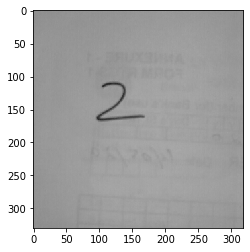

In [22]:
#Check the prediction for your own image
img = cv2.imread("img2.jpg",0)
img = cv2.resize(img, (28, 28))
img = np.reshape(img, [1, 28, 28, 1])
print(np.argmax(model.predict(img)))
imshow(scipy.misc.imread('img2.jpg'))
print("class prediction vector [p(0), p(1), p(2), p(3), p(4), p(5)] = ")
model.predict_proba(img)
